In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine(r"sqlite:///C:\Users\arshd\Documents\sqlalchemy-challenge\SQLAlchemy-Challenge\SurfsUp\Resources\hawaii.sqlite")

In [11]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [12]:
# View all of the classes that automap found
all_classes = Base.classes
for class_name in all_classes.keys():
    print(class_name)

measurement
station


In [13]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [15]:
# Create our session (link) from Python to the DB
session =Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
Most_recent_date= (session.query(measurement.date).order_by(measurement.date.desc()).first())

Most_recent_date

('2017-08-23',)

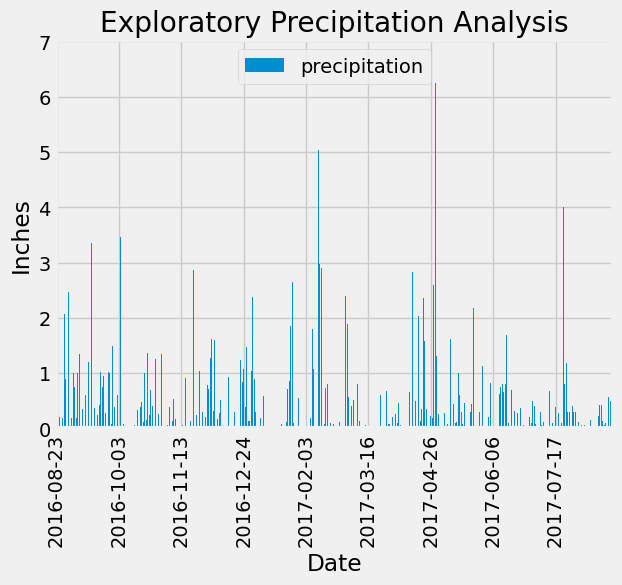

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017, 8, 23)-dt.timedelta(days=365)

one_year_previous_date =dt.date(year_ago.year, year_ago.month, year_ago.day)
# Perform a query to retrieve the data and precipitation scores

precipitation_scores = session.query(measurement.date, func.max(measurement.prcp)).\
    filter(measurement.date >= func.strftime("%Y-%m-%d", one_year_previous_date)).\
    group_by(measurement.date).order_by(measurement.date).all()

precipitation_scores

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_scores,columns = ['date', 'precipitation'])

# Sort the dataframe by date

df.set_index('date', inplace=True)

df.head()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar()
plt.xticks(rotation = 90)
plt.title("Exploratory Precipitation Analysis")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.locator_params(axis='x',nbins=9)
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(station.id).count()

number_of_stations

9

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


most_active_station_id = session.query(measurement.station).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()[0]


Temp_analysis = session.query(
    func.min(measurement.tobs).label('Minimum_Temp'),
    func.max(measurement.tobs).label('Maximum_Temp'),
    func.avg(measurement.tobs).label('Average_Temp')
).filter(measurement.station == most_active_station_id).all()

minimum_temp = Temp_analysis[0].Minimum_Temp
maximum_temp = Temp_analysis[0].Maximum_Temp
average_temp = Temp_analysis[0].Average_Temp

print(f"Most Active Station: {most_active_station_id}")
print(f"Lowest Temperature: {minimum_temp} F")
print(f"Highest Temperature: {maximum_temp} F")
print(f"Average Temperature: {average_temp} F")

Most Active Station: USC00519281
Lowest Temperature: 54.0 F
Highest Temperature: 85.0 F
Average Temperature: 71.66378066378067 F


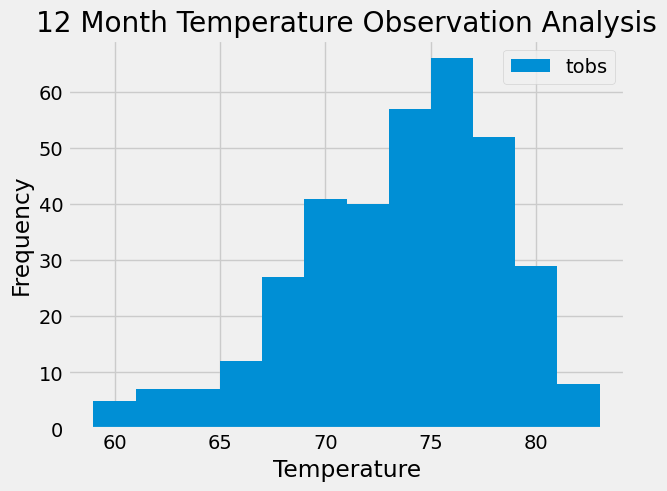

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_data = session.query(measurement.tobs).filter(measurement.station=='USC00519281')\
    .filter(measurement.date> one_year_previous_date).all()

year_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_data_df = pd.DataFrame(year_data,columns = ['tobs'])


# Use Pandas Plotting with Matplotlib to plot the data
year_data_df.plot.hist(bins=12)
plt.title("12 Month Temperature Observation Analysis")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

# Close Session

In [56]:
# Close Session
session.close()